In [41]:
# Modelagem de dados
import pandas as pd
import numpy as np

# Libs gráficas
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# Avisos
import warnings
warnings.filterwarnings('ignore')

# Configurações no pandas
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# Configurações no Matplot
plt.rcParams['figure.figsize'] = ( 15, 6 )
plt.style.use('ggplot')

# **Importação dos dados**

In [42]:
# Dados
Base_Dados = pd.read_csv('clean_data.csv')

# Diemnsao
Base_Dados.shape

(518675, 29)

In [43]:
#verificar
Base_Dados.head(6)

,Unnamed: 0,uf,type_id,codigo_tse,nome_municipio,capital,codigo_ibge,job_count,elector_count,elector_presence,absentees,nominal_votes,blank_votes,total_null_votes,null_votes,technical_null_votes,valid_votes,nulled_votes,judically_nulled_votes,vote_count,candidate_number,candidate_name,candidate_coligation,candidate_vice_name,candidate_vote_destination,candidate_vote_count,legend_votes,job,main_party
0,0,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,11,CAETANO,PP - PP / SOLIDARIEDADE / PSD,MARQUINHOS,Válido,2405,NaN,prefeito,PP
1,1,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,12,HADAMÉS WILSON,PDT,LUCAS NOBRE,Válido,1237,NaN,prefeito,PDT
2,2,AC,11,1120,ACRELÂNDIA,0,1200013,1,s,7093,2076,6849,54,190,190,0,6849,0,0,7093,15,OLAVINHO,MDB - PL / MDB / PSDB,GRAIA,Válido,2638,NaN,prefeito,MDB
3,3,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,90,ROSA DO EURICO,PROS - PSL / PROS,LUIZ DO GÁS,Válido,569,NaN,prefeito,PROS
4,4,AC,13,1120,ACRELÂNDIA,0,1200013,9,n,7093,2076,6482,76,120,120,0,6897,0,0,7093,11130,PAULA CLEURIDES,PP,,Válido,1,415.0,vereador,PP
5,5,AC,13,1120,ACRELÂNDIA,0,1200013,9,n,7093,2076,6482,76,120,120,0,6897,0,0,7093,12345,CALANGO,PDT,,Válido,70,415.0,vereador,PDT


In [44]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518675 entries, 0 to 518674
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  518675 non-null  int64  
 1   uf                          518675 non-null  object 
 2   type_id                     518675 non-null  int64  
 3   codigo_tse                  518675 non-null  int64  
 4   nome_municipio              518675 non-null  object 
 5   capital                     518675 non-null  int64  
 6   codigo_ibge                 518675 non-null  int64  
 7   job_count                   518675 non-null  int64  
 8   elector_count               518675 non-null  object 
 9   elector_presence            518675 non-null  int64  
 10  absentees                   518675 non-null  int64  
 11  nominal_votes               518675 non-null  int64  
 12  blank_votes                 518675 non-null  int64  
 13  total_null_vot

In [45]:
Base_Dados.isnull().sum()

Unnamed: 0                        0
uf                                0
type_id                           0
codigo_tse                        0
nome_municipio                    0
capital                           0
codigo_ibge                       0
job_count                         0
elector_count                     0
elector_presence                  0
absentees                         0
nominal_votes                     0
blank_votes                       0
total_null_votes                  0
null_votes                        0
technical_null_votes              0
valid_votes                       0
nulled_votes                      0
judically_nulled_votes            0
vote_count                        0
candidate_number                  0
candidate_name                    3
candidate_coligation              0
candidate_vice_name               0
candidate_vote_destination        0
candidate_vote_count              0
legend_votes                  18640
job                         

In [46]:
#campos unicos]
Base_Dados.nunique()

Unnamed: 0                    518675
uf                                26
type_id                            2
codigo_tse                      5568
nome_municipio                  5294
capital                            2
codigo_ibge                     5568
job_count                         33
elector_count                      2
elector_presence                4864
absentees                       3562
nominal_votes                   8361
blank_votes                     1784
total_null_votes                2194
null_votes                      2177
technical_null_votes             236
valid_votes                     8402
nulled_votes                      10
judically_nulled_votes          1046
vote_count                      4864
candidate_number               20334
candidate_name                394364
candidate_coligation            7941
candidate_vice_name            16997
candidate_vote_destination         4
candidate_vote_count            8730
legend_votes                    1736
j

In [47]:
#retirar colunas com o parametro .drops(columns= ['nome_da_coluna'], inplace=True ou False)
#inplace serve para aplicar a modificação no no csv se for True
Base_Dados.drop(columns=['Unnamed: 0'], inplace=True)

In [48]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518675 entries, 0 to 518674
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   uf                          518675 non-null  object 
 1   type_id                     518675 non-null  int64  
 2   codigo_tse                  518675 non-null  int64  
 3   nome_municipio              518675 non-null  object 
 4   capital                     518675 non-null  int64  
 5   codigo_ibge                 518675 non-null  int64  
 6   job_count                   518675 non-null  int64  
 7   elector_count               518675 non-null  object 
 8   elector_presence            518675 non-null  int64  
 9   absentees                   518675 non-null  int64  
 10  nominal_votes               518675 non-null  int64  
 11  blank_votes                 518675 non-null  int64  
 12  total_null_votes            518675 non-null  int64  
 13  null_votes    

# **Mão na massa**

## **Prefeitos eleitos no pais**

In [49]:
Base_Dados.head(2)

,uf,type_id,codigo_tse,nome_municipio,capital,codigo_ibge,job_count,elector_count,elector_presence,absentees,nominal_votes,blank_votes,total_null_votes,null_votes,technical_null_votes,valid_votes,nulled_votes,judically_nulled_votes,vote_count,candidate_number,candidate_name,candidate_coligation,candidate_vice_name,candidate_vote_destination,candidate_vote_count,legend_votes,job,main_party
0,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,11,CAETANO,PP - PP / SOLIDARIEDADE / PSD,MARQUINHOS,Válido,2405,NaN,prefeito,PP
1,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,12,HADAMÉS WILSON,PDT,LUCAS NOBRE,Válido,1237,NaN,prefeito,PDT


In [50]:
# Verificando as vagas
Base_Dados['job'].unique()

array(['prefeito', 'vereador'], dtype=object)

In [51]:
#contagem de prefeitos
Query_prefeitos= Base_Dados[
    (Base_Dados['job']=='prefeito') &
    (Base_Dados['elector_count']=='s')]
Query_prefeitos.shape# verifica a quantidade de linhas e colunas

(5519, 28)

In [52]:
#analise
analise_01 = Query_prefeitos.groupby(by=['main_party']).agg(Quantidades=('candidate_vote_count', 'count'))
analise_01.head(3)

,Quantidades
main_party,
AVANTE,82
CIDADANIA,141
DC,1


In [53]:
#Quantidade de prefeitos eleitos
Qtd_prefeitos_eleitos=analise_01['Quantidades'].sum()
Qtd_prefeitos_eleitos

5519

In [54]:
#gerar percentual %
analise_01['%']=analise_01['Quantidades']/Qtd_prefeitos_eleitos *100
analise_01['%']= round(analise_01['%'], 2)
# organizar a ordem
analise_01.sort_values('Quantidades', inplace=True, ascending=False)
#Verifica que eu não estou ficando doido
analise_01.head(3)

,Quantidades,%
main_party,,
MDB,787,14.26
PP,687,12.45
PSD,660,11.96


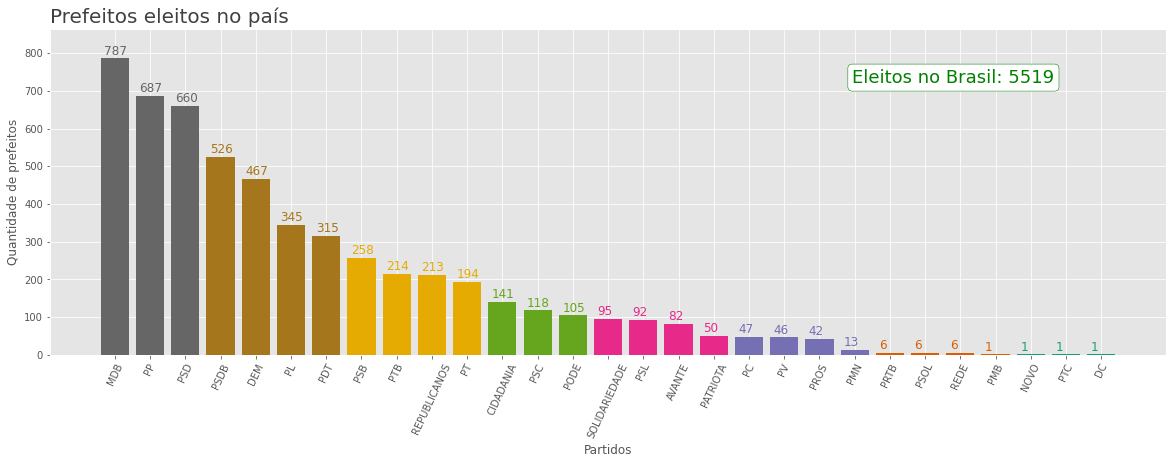

In [55]:
#Gráfico
paleta_de_cores =sns.color_palette('Dark2_r',len(analise_01))

plt.figure(figsize=(20,6))
plt.bar(analise_01.index, #eixo x
        analise_01['Quantidades'], #eixo y
        width=0.8,
        color=paleta_de_cores
        )



#etiquetar
for posicao, valor in enumerate (analise_01['Quantidades']):
  plt.text(
      # Posicao do gráfico ( x, y)
      posicao -0.3, valor + 10,
      # Valor no gráfico
      valor,
      # Paleta
      color=paleta_de_cores[posicao],
      # Tamanho
      size=12,
      # expesura da fonte
      fontweight=400
  )

total_eleitos = analise_01['Quantidades'].sum()
plt.annotate(f'Eleitos no Brasil: {total_eleitos}',
             xy=(0.90,0.85),
             xycoords='axes fraction',
             ha='right', 
             va='center',
             color='green',
             fontsize=18,
             fontweight=500,
             bbox=dict(facecolor='#ffffff', edgecolor='green', boxstyle='round', pad=0.25)
             )
#limite 
plt.ylim(0, analise_01['Quantidades'].max() + (analise_01['Quantidades'].max() * 0.1))
#título
plt.title('Prefeitos eleitos no país',loc='left', fontsize=20, color='#404040', fontweight=400)
#laterais
plt.ylabel('Quantidade de prefeitos')
plt.xlabel('Partidos')
plt.xticks(rotation=65);

## **Vereadores Eleitos no país**

In [56]:
#contagem de vereadores
Query_vereadores = Base_Dados[
    (Base_Dados['job']=='vereador') &
    (Base_Dados['elector_count']=='s')]
Query_vereadores.shape

(57866, 28)

In [57]:
analise_02 = Query_vereadores.groupby(by=['main_party']).agg(Quantidades=('candidate_vote_count', 'count'))
analise_02.head(3)

,Quantidades
main_party,
AVANTE,1046
CIDADANIA,1583
DC,121


In [58]:
#Quantidade de prefeitos eleitos
Qtd_vereadores_eleitos=analise_02['Quantidades'].sum()
Qtd_vereadores_eleitos

57866

In [59]:
#gerar percentual %
analise_02['%']=analise_02['Quantidades']/Qtd_vereadores_eleitos *100
analise_02['%']= round(analise_02['%'], 2)
# organizar a ordem
analise_02.sort_values('Quantidades', inplace=True, ascending=False)
#Verifica que eu não estou ficando doido
analise_02.head(3)

,Quantidades,%
main_party,,
MDB,7311,12.63
PP,6331,10.94
PSD,5676,9.81


Text(0.0, 1.0, 'Vereadores eleitos no pais')

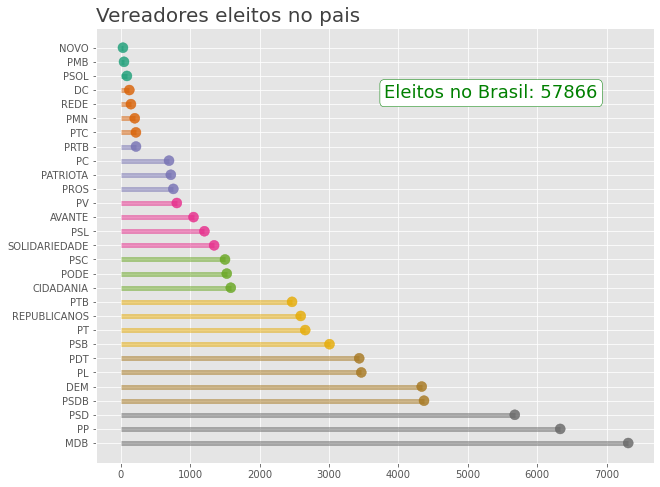

In [64]:
plt.figure(figsize=(10,8))
plt.hlines(
    y=analise_02.index, xmin=0, xmax=(analise_02['Quantidades']),
    lw=5,
    colors= paleta_de_cores,#transparencia
    alpha=0.5,
);
plt.scatter( 
    # Dados
    analise_02['Quantidades'],
    analise_02.index,
    # Tamanho do ponto
    s=100,
    # Cor
    color=paleta_de_cores,
    # Transparencia
    alpha=0.8
)
total_eleitos_vereadores= analise_02['Quantidades'].sum()
plt.annotate(f'Eleitos no Brasil: {total_eleitos_vereadores}',
             xy=(0.90,0.85),
             xycoords='axes fraction',
             ha='right', 
             va='center',
             color='green',
             fontsize=18,
             fontweight=500,
             bbox=dict(facecolor='#ffffff', edgecolor='green', boxstyle='round', pad=0.25)
             )
plt.title('Vereadores eleitos no pais', loc='left', fontsize=20, color='#404040', fontweight=400)


## **Analise de correlação**

In [69]:
# Tab
Tab_Correlacao = analise_01['Quantidades'].reset_index()

# Cruzamento
Tab_Correlacao = pd.merge( Tab_Correlacao, analise_02.reset_index(), on=['main_party'], how='inner' )

# Ajustar
Tab_Correlacao.columns = ['Partido', 'Prefeitos', 'Vereadores', '%']

# Drop
Tab_Correlacao.drop( columns=['%'], inplace=True )

# Verificando
Tab_Correlacao.head()

,Partido,Prefeitos,Vereadores
0,MDB,787,7311
1,PP,687,6331
2,PSD,660,5676
3,PSDB,526,4368
4,DEM,467,4335


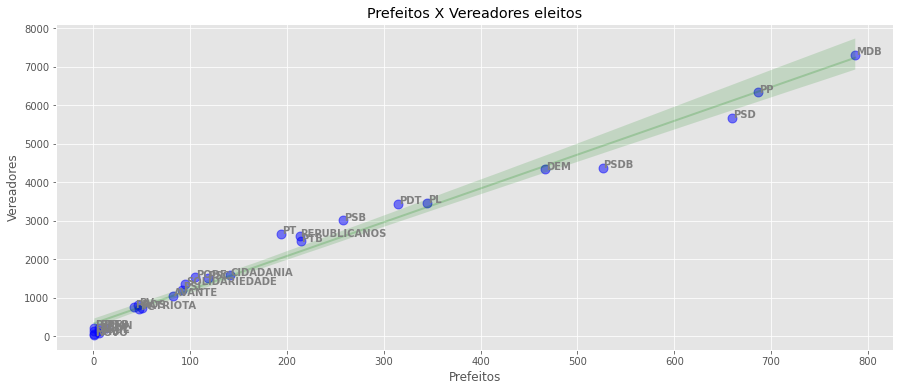

In [94]:
sns.regplot(
    #daods
    x=Tab_Correlacao['Prefeitos'],
    y=Tab_Correlacao['Vereadores'],
    # intervalo de confiança para estimar a regressão 
    ci = 95,
    scatter_kws={
    'color': 'blue',
    's': 80,
    'alpha': 0.5
    },
    line_kws={
    'color': 'green',
    'alpha': 0.2,
    'lw': 2
    },
)
plt.title('Prefeitos X Vereadores eleitos')
for linha in range(0, Tab_Correlacao.shape[0]):
  plt.text(
      Tab_Correlacao['Prefeitos'][linha]+0.8,
      Tab_Correlacao['Vereadores'][linha],
      Tab_Correlacao['Partido'][linha],
      size='medium',
      color='gray',
      weight='semibold'
  )

## **Gráfico tridimensional**

In [144]:
Quantidade_candidatos = Base_Dados.groupby(by=['main_party']).count().iloc[:,0:1].reset_index()

Quantidade_candidatos.columns = ['Partido', 'Candidatos']
Quantidade_candidatos.head(3)

,Partido,Candidatos
0,AVANTE,14228
1,CIDADANIA,16390
2,DC,4385


In [177]:
Tab_Correlacao.head(3)
#Tab_Correlacao.drop(columns=['Candidatos_y'],inplace=True )

,Partido,Prefeitos,Vereadores,Candidatos
0,MDB,787,7311,42169
1,PP,687,6331,36158
2,PSD,660,5676,37271


In [162]:
Tab_Correlacao = pd.merge(Tab_Correlacao, Quantidade_candidatos, on=['Partido'], how='inner')
Tab_Correlacao.head()

,Partido,Prefeitos,Vereadores,Candidatos
0,MDB,787,7311,42169
1,PP,687,6331,36158
2,PSD,660,5676,37271
3,PSDB,526,4368,31011
4,DEM,467,4335,31212


In [163]:
Tab_Correlacao.corr()#correlação

,Prefeitos,Vereadores,Candidatos
Prefeitos,1.000000,0.990918,0.916985
Vereadores,0.990918,1.000000,0.952979
Candidatos,0.916985,0.952979,1.000000


Text(0.5, 0, 'Candidatos')

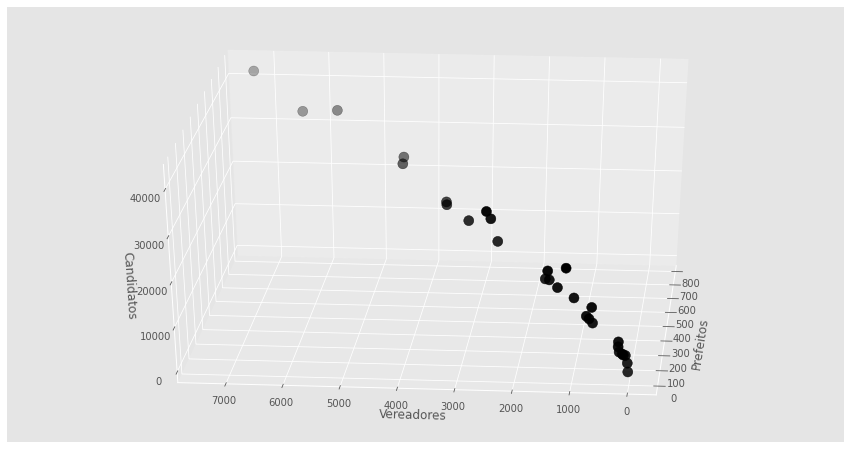

In [189]:
figura= plt.figure(figsize=(15,8))

#instanciar
eixo= figura.add_subplot(111, projection='3d')
eixo.scatter(
    Tab_Correlacao['Prefeitos'],
    Tab_Correlacao['Vereadores'],
    Tab_Correlacao['Candidatos'],
    c='black',
    s=100  
)
eixo.view_init(30,185)
#labels
eixo.set_xlabel('Prefeitos')
eixo.set_ylabel('Vereadores')
eixo.set_zlabel('Candidatos')

